In [1]:
import math

import numpy as np
import pandas as pd
from sklearn.mixture import GMM
from matplotlib import pyplot as plt
from matplotlib import mlab


%matplotlib inline

In [2]:
model = GMM(n_components=2, n_iter=100)

In [3]:
men_df = pd.read_csv('men.csv')
women_df = pd.read_csv('women.csv')
observations_df = pd.read_csv('observations.csv')

In [4]:
men = men_df['0'].values
women = women_df['0'].values
observations = observations_df['0'].values

In [5]:
model.fit(observations)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=0.01)

In [6]:
model.means_

array([[ 173.99805262],
       [ 158.71595919]])

In [7]:
np.sqrt(model.covars_)

array([[ 6.44767528],
       [ 5.00842679]])

In [8]:
model.weights_

array([ 0.70781609,  0.29218391])

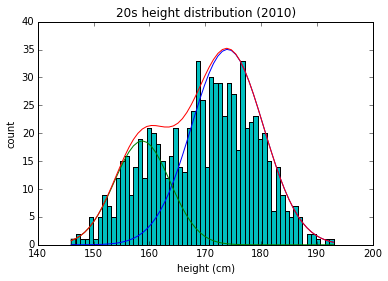

In [9]:
bins = np.linspace(math.ceil(min(observations)),
                   math.floor(max(observations)),
                   60)

mixed_model = np.array([])

for i in range(model.n_components):
    pdf = mlab.normpdf(bins, model.means_[i][0], np.sqrt(model.covars_[i][0])) * len(observations) * model.weights_[i]
    
    if mixed_model.any():
        mixed_model += pdf
    else:
        mixed_model = pdf
        
    plt.plot(bins, pdf)

plt.plot(bins, mixed_model)
plt.hist(observations, bins=bins)

plt.title('20s height distribution (2010)')
plt.xlabel('height (cm)')
plt.ylabel('count')

In [10]:
model.bic(observations)

5809.3763048585843